## Question 1 (20 points):
Write a script that:

* Computes the Euclidean distance to another **amenity** of your choosing (HINT: use `gdf['amenity'].unique()` to list the different amenities). Feel free to download OSM buildings from another place and choose a different home' location.


* Makes an interactive map showing where your ten nearest amenities are using `folium`. 

In [1]:
# Import modules
import osmnx as ox 

import numpy as np
import pandas as pd
import geopandas as gpd

from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon
from shapely.geometry import LineString, MultiLineString

In [2]:
# Specify type of data
tags = {'building': True}

# Download building geometries from OSM
gdf = ox.geometries_from_place('Eugene, Oregon, USA', tags)

/Users/isaiastorres/opt/anaconda3/envs/lab3/lib/python3.8/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Users/isaiastorres/opt/anaconda3/envs/lab3/lib/python3.8/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [3]:
gdf['amenity'].unique()

array([nan, 'restaurant', 'fuel', 'fire_station', 'cafe',
       'place_of_worship', 'fast_food', 'library', 'theatre', 'shelter',
       'school', 'bank', 'studio', 'dentist', 'social_facility',
       'training', 'pub', 'college', 'cinema', 'conference_centre',
       'community_centre', 'police', 'parking', 'doctors', 'post_office',
       'clinic', 'bus_station', 'prison', 'courthouse', 'veterinary',
       'music_school', 'bar', 'nightclub', 'car_wash', 'animal_shelter',
       'toilets', 'biergarten', 'childcare', 'recycling', 'marketplace',
       'bicycle_parking', 'arts_centre', 'events_venue', 'social_centre',
       'ice_cream'], dtype=object)

In [4]:
ffood = gdf[gdf['amenity'] == 'fast_food'].reset_index()
ffood

,element_type,osmid,addr:state,building,ele,gnis:county_id,gnis:created,gnis:feature_id,name,operator,...,house:soliciting,soliciting,covered,facebook,opening_hours:url,yelp,surface,ways,type,contact:website
0,way,123493969,NaN,yes,NaN,NaN,NaN,NaN,Carl's Jr.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,way,215635196,OR,yes,NaN,NaN,NaN,NaN,Taco Time,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,way,221685107,OR,yes,NaN,NaN,NaN,NaN,Papa John's,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,way,277755625,NaN,yes,NaN,NaN,NaN,NaN,Burrito Boy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,way,311036526,NaN,yes,NaN,NaN,NaN,NaN,Taco Bell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,way,311036528,OR,yes,NaN,NaN,NaN,NaN,Burger King,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,way,311038546,NaN,yes,NaN,NaN,NaN,NaN,Carl's Jr.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,way,311038547,OR,commercial,NaN,NaN,NaN,NaN,Arby's,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,way,311038549,NaN,yes,NaN,NaN,NaN,NaN,KFC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,way,311039612,NaN,yes,NaN,NaN,NaN,NaN,Dairy Queen,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
gdf = gdf.to_crs('EPSG:32610')
ffood = ffood.to_crs('EPSG:32610')
ffood

,element_type,osmid,addr:state,building,ele,gnis:county_id,gnis:created,gnis:feature_id,name,operator,...,house:soliciting,soliciting,covered,facebook,opening_hours:url,yelp,surface,ways,type,contact:website
0,way,123493969,NaN,yes,NaN,NaN,NaN,NaN,Carl's Jr.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,way,215635196,OR,yes,NaN,NaN,NaN,NaN,Taco Time,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,way,221685107,OR,yes,NaN,NaN,NaN,NaN,Papa John's,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,way,277755625,NaN,yes,NaN,NaN,NaN,NaN,Burrito Boy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,way,311036526,NaN,yes,NaN,NaN,NaN,NaN,Taco Bell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,way,311036528,OR,yes,NaN,NaN,NaN,NaN,Burger King,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,way,311038546,NaN,yes,NaN,NaN,NaN,NaN,Carl's Jr.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,way,311038547,OR,commercial,NaN,NaN,NaN,NaN,Arby's,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,way,311038549,NaN,yes,NaN,NaN,NaN,NaN,KFC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,way,311039612,NaN,yes,NaN,NaN,NaN,NaN,Dairy Queen,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
mka = gdf[gdf['name'] == 'Matthew Knight Arena'].reset_index()
mka

,element_type,osmid,addr:state,building,ele,gnis:county_id,gnis:created,gnis:feature_id,name,operator,...,house:soliciting,soliciting,covered,facebook,opening_hours:url,yelp,surface,ways,type,contact:website
0,way,155181213,NaN,university,NaN,NaN,NaN,NaN,Matthew Knight Arena,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:

ffood['centroid'] = ffood['geometry'].apply(
  lambda x: x.centroid if type(x) == Polygon else (
  x.centroid if type(x) == MultiPolygon else x))

mka['centroid'] = mka['geometry'].apply(
  lambda x: x.centroid if type(x) == Polygon else (
  x.centroid if type(x) == MultiPolygon else x))

In [8]:
# Compute distances
mka_x = mka['centroid'].x.values[0]
mka_y = mka['centroid'].y.values[0]
distances = np.sqrt(((mka_x - ffood['centroid'].x.values)**2)
                     + ((mka_y - ffood['centroid'].y.values)**2))

# Add to GeoDataFrame
ffood['euclidean_distance'] = distances
ffood['euclidean_distance']

0      6529.415541
1      5866.900498
2      2918.251971
3      1562.285504
4      7555.046502
5      7795.924043
6      7547.217564
7      7586.198950
8      8079.244912
9      8093.895763
10     7453.785106
11     7323.959434
12     2550.245364
13     1254.967415
14     1475.762555
15     5934.024000
16     2529.772556
17     2441.046066
18     8351.498688
19    10370.479412
20     8191.747945
21     9565.811899
22     6289.168576
23     2175.152783
24     5513.846360
25     6652.857255
26     8864.982959
27     9279.078563
28     9420.872861
29     9253.462515
30     7743.594089
31     2776.186997
32     5060.985813
33     3978.689552
34     4073.159614
35     3914.843428
36     5367.440114
37     5301.477141
38     5089.698883
39     2725.298426
Name: euclidean_distance, dtype: float64

In [9]:
print(ffood.nsmallest(10, ['euclidean_distance'])[['name', 'euclidean_distance']])

                         name  euclidean_distance
13                Dairy Queen         1254.967415
14                 McDonald's         1475.762555
3                 Burrito Boy         1562.285504
23            Rivas Taco Shop         2175.152783
17                 Carl's Jr.         2441.046066
16                   Domino's         2529.772556
12                 Baja Fresh         2550.245364
39  Da Nang Vietnamese Eatery         2725.298426
31                 McDonald's         2776.186997
2                 Papa John's         2918.251971


In [13]:
# Make a new DataFrame containing only the three most relevant columns
nearest_ffood = ffood.nsmallest(10, ['euclidean_distance'])[['name', 'euclidean_distance', 'centroid']]

# Set column geometry
nearest_ffood = nearest_ffood.set_geometry('centroid')

# Convert back to WGS84
nearest_ffood = nearest_ffood.to_crs('EPSG:4326')

# Import package
import folium

# Define center of map (i.e. MKA) and initial zoom level
lat_lon = [44.0449, -123.0663]
m = folium.Map(location=lat_lon, zoom_start=16)

for i in range(0, nearest_ffood.shape[0]):
    my_string = 'name: {}, distance: {}'.format(nearest_ffood.iloc[i]['name'], nearest_ffood.iloc[i]['euclidean_distance'])
    folium.Marker([nearest_ffood.iloc[i]['centroid'].y, nearest_ffood.iloc[i]['centroid'].x],
                 popup=my_string).add_to(m)

# Display map
m

## Question 2 (20 points): 

Adapt the code above to compute the network distance between two points (either in Eugene or in a city of your choice) and show your results using an interactive map. Write a few sentences about what your map shows.

In [14]:
# Import module
import networkx as nx

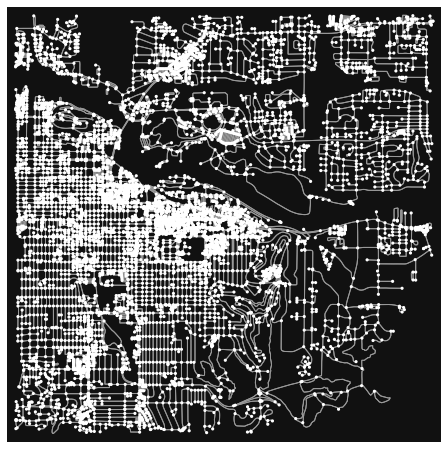

In [15]:
# Define coordinates of Condon Hall
lat_lon = (44.0449, -123.0663)

# Import walkable street network data around MKA
g = ox.graph_from_point(lat_lon, dist=3000, network_type='walk')

# Plot map
fig, ax = ox.plot_graph(g, node_size=10)

In [16]:
# Convert to graph
graph_proj = ox.project_graph(g)

# Get edges and nodes separately
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [18]:
# Check projection is UTM Zone 10N
print("Coordinate system:", edges_proj.crs)

# Convert the cafe dataset back to UTM Zone 10N
nearest_ffood = nearest_ffood.to_crs('EPSG:32610')

Coordinate system: +proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [19]:
# Get x and y coordinates of MKA
orig_xy = (mka['centroid'].y.values[0], mka['centroid'].x.values[0])

# Get x and y coordinates of one of the fast food places (the furthest of the ten)
target_xy = (nearest_ffood['centroid'].y.values[-1], nearest_ffood['centroid'].x.values[-1])

In [20]:
# Find the node in the graph that is closest to the origin point (here, we want to get the node id)
orig_node = ox.distance.nearest_nodes(G=graph_proj, X=orig_xy[1], Y=orig_xy[0], return_dist=False)

# Find the node in the graph that is closest to the target point (here, we want to get the node id)
target_node = ox.distance.nearest_nodes(graph_proj, X=target_xy[1], Y=target_xy[0], return_dist=False)

In [21]:
# Calculate the shortest path
route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')

In [22]:
# Plot the shortest path using folium
m = ox.plot_route_folium(g, route, weight=5)
m

This map shows the shortest route from Matthew Knight Arena to the fast food location we calculated with the 10th farthest Euclidean Distance, Papa John's Pizza. This location had a Euclidean Distance of 2.9 km.

## Question 3 (10 points): 


* a) Calculate the average difference between the Euclidean and network distances for you amenities 


* b) Describe some situations where it would not be advisable to use Euclidean distances?

In [24]:
# Get the nodes along the shortest path
route_nodes = nodes_proj.loc[route]

# Create a geometry for the shortest path
route_line = LineString(list(route_nodes['geometry'].values))

# Create a GeoDataFrame
route_geom = gpd.GeoDataFrame([[route_line]], geometry='geometry', crs=edges_proj.crs, columns=['geometry'])

# Print length of route
print('Walking distance to %s = %.1f km' % (nearest_ffood['name'].iloc[-1], route_geom['geometry'].length / 1000))

Walking distance to Papa John's = 3.9 km


In [26]:
# Get x and y coordinates of all ten of the nearest cafes
target_xy = (nearest_ffood['centroid'].y.values, nearest_ffood['centroid'].x.values)

In [28]:
routes = []
distances = []
for i in range(len(target_xy[0])):
    
    # Find the node in the graph that is closest to the target point (here, we want to get the node id)
    target_node = ox.distance.nearest_nodes(graph_proj, X=target_xy[1][i], Y=target_xy[0][i], return_dist=False)
    
    # Calculate the shortest path
    route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')
    
    # Append route to list
    routes.append(route)
    
    # Get the nodes along the shortest path
    route_nodes = nodes_proj.loc[route]
    
    # Create a geometry for the shortest path
    route_line = LineString(list(route_nodes['geometry'].values))

    # Create a GeoDataFrame
    route_geom = gpd.GeoDataFrame([[route_line]], geometry='geometry', crs=edges_proj.crs, columns=['geometry'])

    # Print length of route
    print('Walking distance to %s = %.1f km' % (nearest_ffood['name'].iloc[i], route_geom['geometry'].length / 1000))
    
    # Append distances to list
    distances.append(route_geom['geometry'].length[0])

Walking distance to Dairy Queen = 1.3 km
Walking distance to McDonald's = 1.8 km
Walking distance to Burrito Boy = 1.7 km
Walking distance to Rivas Taco Shop = 2.5 km
Walking distance to Carl's Jr. = 4.0 km
Walking distance to Domino's = 3.4 km
Walking distance to Baja Fresh = 4.2 km
Walking distance to Da Nang Vietnamese Eatery = 3.0 km
Walking distance to McDonald's = 3.8 km
Walking distance to Papa John's = 3.9 km


In [29]:
nearest_ffood['network_distance'] = distances
nearest_ffood

,name,euclidean_distance,centroid,network_distance
13,Dairy Queen,1254.967415,POINT (493438.215 4876908.731),1348.484019
14,McDonald's,1475.762555,POINT (493345.042 4877456.698),1821.338019
3,Burrito Boy,1562.285504,POINT (493226.548 4877395.203),1711.711912
23,Rivas Taco Shop,2175.152783,POINT (492521.932 4876704.631),2451.733994
17,Carl's Jr.,2441.046066,POINT (494026.881 4879202.356),3959.898135
16,Domino's,2529.772556,POINT (492752.962 4875228.861),3408.674003
12,Baja Fresh,2550.245364,POINT (494258.274 4879366.761),4219.906552
39,Da Nang Vietnamese Eatery,2725.298426,POINT (492191.792 4877938.258),2967.424926
31,McDonald's,2776.186997,POINT (492764.827 4874855.335),3785.532290
2,Papa John's,2918.251971,POINT (492671.027 4874748.440),3931.400416


In [33]:
difference = nearest_ffood['network_distance']-nearest_ffood['euclidean_distance']
difference

13      93.516604
14     345.575464
3      149.426408
23     276.581211
17    1518.852069
16     878.901446
12    1669.661189
39     242.126500
31    1009.345293
2     1013.148445
dtype: float64

In [35]:
difference.sum()/10

719.7134629214245

The average difference between the euclidean and network distances of the fast food locations near Matthew Knight Arena is 0.7197 km.

It would not be advisable to use euclidean distances for high dimensions as it loses pretty much all its meaning.
Also calculating the euclidean distance of a place to another place that does not have a straight line path would severely underestimate the true distance and would be useless. Euclidean distance calculates straight line distances and most of the time there is not a straight line path from point A to point B. This is where I would say calculating a Manhattan distance would be more useful as it accounts for having to make turns, and therefore offers a more accurate distance.